## Merge, Join, Concatenate and Compare

Pandas has various facilities for easily combining together ***Series*** or ***DataFrame*** with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type opearations.
We can also compare ***Series*** or ***DataFrame*** to summarize their differences.

### Concatenating Objects
The **concat()** function does all of the performing concatenation operations along an axis while performing set logic(Union or Intersection) of the indexes on the other axes.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df1 = pd.DataFrame(
{
    "A":["A0","A1","A2","A3"],
    "B":["B0","B1","B2","B3"],
    "C":["C0","C1","C2","C3"],
    "D":["D0","D1","D2","D3"]
},
    index = [0,1,2,3],
)
df1.head()

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [98]:
df2 = pd.DataFrame(
{
    "A":["A4","A5","A6","A7"],
    "B":["B4","B5","B6","B7"],
    "C":["C4","C5","C6","C7"],
    "D":["D4","D5","D6","D7"]
},
    index = [4,5,6,7],
)
df2.head()

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [99]:
df3 = pd.DataFrame(
{
    "A":["A8","A9","A10","A11"],
    "B":["B8","B9","B10","B11"],
    "C":["C8","C9","C10","C11"],
    "D":["D8","D9","D10","D11"]
},
    index = [8,9,10,11],
)
df3.head()

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [100]:
frames =[df1,df2,df3]

In [101]:
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [102]:
result = pd.concat(frames,keys=["x","y","z"])
result.head()

A   B   C   D
x 0  A0  B0  C0  D0
  1  A1  B1  C1  D1
  2  A2  B2  C2  D2
  3  A3  B3  C3  D3
y 4  A4  B4  C4  D4

In [103]:
result.loc["y"]

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


****If we need to use the operation over several datasets, use a list comprehension*****Written by me

In [104]:
import os
path="C:\\Users\\Ashish Kumar\\Desktop\\Data Science\\Pandas\\CSV Folder\\"
files = os.listdir(path)
DataFrame =[]
for file in files:
    DataFrame.append(pd.read_csv(path+file))
result=pd.concat(DataFrame,ignore_index=True)
result.head()

,EmpId,EmpName,Dept
0,1213,Neha,CSE
1,1233,Ashish,IT
2,7658,Komal,MEC
3,5689,Deepak,Java
4,4235,Piyush,Java


### Set logic on the other axes

let's see the command **pd.concat()** 

* obj:- a sequence of mapping of Series or DataFrame objects. If a dict is passed, the sorted keys will be used as the **keys** argument.
* axis:- {0,1.....} default 0.
* join:- {'inner','Outer'}, default 'outer'. **outer** for union and **inner** for intersection.
* ignore_index:- boolean, default False. If True, do not use the index values of the concatenation axis. The resulting axis will be labeled 0,1....n-1.
* keys:- sequence, default None.

When gluing together multiple DataFrames, we have a choice of how to handle the other axes(othe than the one being concatenated).
 * Take the union of them all, join="outer".
 * Take the intersection, join="inner"

In [105]:
df4 = pd.DataFrame(
    {
        "B":["B2","B3","B6","B7"],
        "D":["D2","D3","D6","D7"],
        "F":["F2","F3","F6","F7"],
    },
    index = [2,3,6,7],
)
result = pd.concat([df1,df4],axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [106]:
result = pd.concat([df1,df4],axis=1,join="inner")
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [107]:
result=pd.concat([df1,df4],axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [108]:
## or we can use indexing before the concatenation
pd.concat([df1,df4.reindex(df1.index)],axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### Concatenating using append

A useful shortcut to **concat()** are the **append()** instance methods on **Series** and **DataFrame**. They concatenate along axis=0

In [109]:
result = df1.append(df2)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [110]:
 result = df1.append(df4,sort=False)
 result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [111]:
result = df1.append([df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### Database-style DataFrame or named Series joining/Merging

Pandas provides a single, **merge()**, as the entry point for all standard database join operations between **DataFrame** or named **Series** 

* left:- A DataFrame or named Series object
* right:- Another DataFrame or named Series object
* on:- Column or index level names to join on. Must be found in both the left and right DataFrame and or Series object.
* left_on:- Columns or index levels from the left DataFrame or Series to use as keys.
* right_on:- Columns or index levels from the right DataFrame or Series to use as keys
* left_index:- if True, use the index(row labels) from the left DataFrame or Series as its join keys.
* right_index:- same as above but for right DataFrame
* how:- One of 'left','right','outer','inner'. Defaults to inner
* sort:- Sort the result DataFrame by the join keys in lexicographic order.
* validate:- string, default None. If specified, checks if merge is of specified type.
*    – “one_to_one” or “1:1”: checks if merge keys are unique in both left and right datasets.
*    – “one_to_many” or “1:m”: checks if merge keys are unique in left dataset.
*    – “many_to_one” or “m:1”: checks if merge keys are unique in right dataset.
*    – "many_to_one" or "m:m" checks if merge keys are unique in right dataset.

In [112]:
left = pd.DataFrame(
        {
            "key":["K0","K1","K2","K3"],
            "A":["A0","A1","A2","A3"],
            "B":["B0","B1","B2","B3"]
        }
)
right = pd.DataFrame(
        {
            "key":["K0","K1","K2","K3"],
            "C":["C0","C1","C2","C3"],
            "D":["D0","D1","D2","D"]
        }
)

In [113]:
result = pd.merge(left,right,on="key")
result.head()

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D


In [114]:
left = pd.DataFrame(
    {
        "key1":["K0","K0","K1","K2"],
        "key2":["K0","K1","K0","K1"],
        "A":["A0","A1","A2","A3"],
        "B":["B0","B1","B2","B3"],
    }
)
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [115]:
right = pd.DataFrame(
    {
    "key1":["K0","K1","K1","K2"],
    "key2":["K0","K0","K0","K0"],
    "C":["C0","C1","C2","C3"],
    "D":["D0","D1","D2","D3"]
    }
)
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [116]:
result = pd.merge(left,right,on=["key1","key2"])
result.head()

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


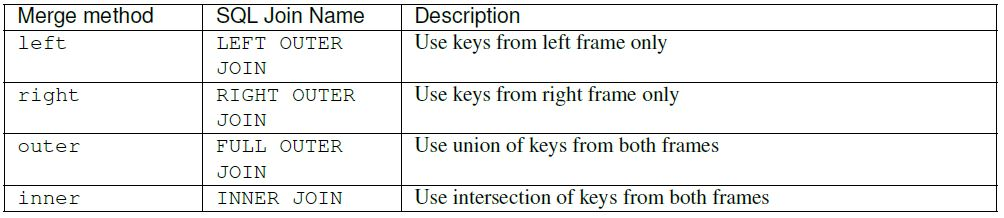

In [117]:
result = pd.merge(left,right,how="left",on=["key1","key2"])
result.head()

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [118]:
result = pd.merge(left,right,how="right",on=["key1","key2"])
result.head()

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [119]:
result = pd.merge(left,right,how="outer",on=["key1","key2"])
result.head()

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [120]:
result = pd.merge(left,right,how="inner",on=["key1","key2"])
result.head()

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


We can merge a multi indexed series and a DataFrame, if the names of the MultiIndex correspond to the columns from the DataFrame.Transform the series to a DataFrame using Series.reset_index() before merging.

In [121]:
df = pd.DataFrame(
{
    "Let":["A","B","C"],
    "Num":[1,2,3]
}
)
df.head()

,Let,Num
0,A,1
1,B,2
2,C,3


In [122]:
ser = pd.Series(
 ["a", "b", "c", "d", "e", "f"],
 index=pd.MultiIndex.from_arrays(
 [["A", "B", "C"] * 2, [1, 2, 3, 4, 5, 6]], names=["Let", "Num"]
 ),
)
ser

Let  Num
A    1      a
B    2      b
C    3      c
A    4      d
B    5      e
C    6      f
dtype: object

In [123]:
ser.reset_index()

,Let,Num,0
0,A,1,a
1,B,2,b
2,C,3,c
3,A,4,d
4,B,5,e
5,C,6,f


In [124]:
pd.merge(df,ser.reset_index(),on=["Let","Num"])

,Let,Num,0
0,A,1,a
1,B,2,b
2,C,3,c


### Joining on Index

In [125]:
left=pd.DataFrame(
    {
        "A":["A0","A1","A2"],
        "B":["B0","B1","B2"],
    },
    index = ["K0","K1","K2"]
)
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [126]:
right = pd.DataFrame(
    {
        "C":["C0","C2","C3"],
        "D":["D0","D2","D3"]
    },
    index = ["K0","K2","K3"]
)
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [127]:
result = left.join(right)
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [128]:
result = left.join(right,how="outer")
result

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [129]:
result = left.join(right,how="inner")
result

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [130]:
result = right.join(left)
result

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [131]:
result= right.join(left,how="outer")
result

,C,D,A,B
K0,C0,D0,A0,B0
K1,NaN,NaN,A1,B1
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


### Joining key columns on an index

In [132]:
left = pd.DataFrame(
    {
        "A":["A0","A1","A2","A3"],
        "B":["B0","B1","B2","B3"],
        "key":["K0","K1","K0","K1"],
    }
)
right=pd.DataFrame(
    {
        "C" : ["C0","C1"],"D":["D0","D1"]
    },
    index = ["K0","K1"]
)

result = left.join(right,on="key")
result.head()

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [133]:
result = pd.merge(
    left,right, left_on="key",right_index = True, how="left"
)
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [134]:
left= pd.DataFrame(
    {
        "A":["A0","A1","A2","A3"],
        "B":["B0","B1","B2","B3"],
        "key1":["K0","K0","K1","K2"],
        "key2":["K0","K1","K0","K1"]
    }
)
index = pd.MultiIndex.from_tuples(
        [("K0","K0"),("K1","K0"),("K2","K0"),("K2","K1")]
)
right = pd.DataFrame(
    {
        "C":["C0","C1","C2","C3"],
        "D":["D0","D1","D2","D3"]
    },
    index=index
)
result = left.join(right,on=["key1","key2"])
result.head()

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


In [135]:
result = left.join(right,on=["key1","key2"],how="inner")
result.head()

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,C3,D3


### Joining a Single Index to a MultiIndex

In [136]:
left = pd.DataFrame(
    {
        "A": ["A0","A1","A2"],
        "B": ["B0","B1","B2"]
    },
    index = pd.Index(["K0","K1","K2"],name="key"),
)
left.head()

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [137]:
index = pd.MultiIndex.from_tuples(
    [("K0","Y0"),("K1","Y1"),("K2","Y2"),("K2","Y3")],
    names = ["key","Y"]
)
right = pd.DataFrame(
        {
            "C":["C0","C1","C2","C3"],
            "D":["D0","D1","D2","D3"]
        },
    index = index
)
result = left.join(right,how="inner")
result.head()

A   B   C   D
key Y                 
K0  Y0  A0  B0  C0  D0
K1  Y1  A1  B1  C1  D1
K2  Y2  A2  B2  C2  D2
    Y3  A2  B2  C3  D3

### Timeseries Friendly Merging

**Merging Ordered Data**

A **merge_ordered()** function allows combining time series and other ordered data.It has optional **fill_method** keyword to fill/interpolate missing data.

In [138]:
left = pd.DataFrame(
    {
        "k":["K0","K1","K1","K2"],
        "lv":[1,2,3,4],
        "S": ["a","b","c","d"]      
    }
)
left

,k,lv,S
0,K0,1,a
1,K1,2,b
2,K1,3,c
3,K2,4,d


In [139]:
right = pd.DataFrame(
    {
        "k":["K1","K2","K4"],
        "rv": [1,2,3]
    }
)
pd.merge_ordered(left,right,fill_method = "ffill",left_by="S")

,k,lv,S,rv
0,K0,1.0,a,NaN
1,K1,1.0,a,1.0
2,K2,1.0,a,2.0
3,K4,1.0,a,3.0
4,K1,2.0,b,1.0
5,K2,2.0,b,2.0
6,K4,2.0,b,3.0
7,K1,3.0,c,1.0
8,K2,3.0,c,2.0
9,K4,3.0,c,3.0


### Merging asof

A **merge_asof()** is similar to an ordered left-join except we match on nearest key rather than equal keys. For each row in the left DataFrame, we select the last row in the right DataFrame whose **on** key is less than the left's key. Both DataFrames must be sorted by keys.

In [140]:
trades = pd.DataFrame(
 {
     "time": pd.to_datetime(
     [
         "20160525 13:30:00.023",
         "20160525 13:30:00.038",
         "20160525 13:30:00.048",
         "20160525 13:30:00.048",
         "20160525 13:30:00.048",
 ]
 ),
      "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
      "price": [51.95, 51.95, 720.77, 720.92, 98.00],
      "quantity": [75, 155, 100, 100, 100],
 },
    columns = ["time","ticker","price","quantity"],
)
trades.head()

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [141]:
quotes = pd.DataFrame(
 {
 "time": pd.to_datetime(
 [
     "20160525 13:30:00.023",
     "20160525 13:30:00.023",
     "20160525 13:30:00.030",
     "20160525 13:30:00.041",
     "20160525 13:30:00.048",
     "20160525 13:30:00.049",
     "20160525 13:30:00.072",
     "20160525 13:30:00.075",
 ]
),
 "ticker": ["GOOG", "MSFT", "MSFT", "MSFT", "GOOG", "AAPL", "GOOG","MSFT"],
 "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99, 720.50, 52.01],
 "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01, 720.88, 52.03],
 },
    columns=["time", "ticker", "bid", "ask"],
)

quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [142]:
pd.merge_asof(trades,quotes,on="time",by="ticker")

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


### Comparing Objects

**The *compare()* method allow us to compare two DataFrame or Series,and summarise their differences.**

In [143]:
df = pd.DataFrame(
{
    "col1":["a","a","b","b","a"],
    "col2":[1.0,2.0,3.0,np.nan,5.0],
    "col3":[1.0,2.0,3.0,4.0,5.0]
},
    columns = ["col1","col2","col3"]
)
df

,col1,col2,col3
0,a,1.0,1.0
1,a,2.0,2.0
2,b,3.0,3.0
3,b,NaN,4.0
4,a,5.0,5.0


In [144]:
df2 = df.copy()
df2.loc[0,"col1"]="c"
df2.loc[2,"col3"]=4.0
df2

,col1,col2,col3
0,c,1.0,1.0
1,a,2.0,2.0
2,b,3.0,4.0
3,b,NaN,4.0
4,a,5.0,5.0


In [145]:
df.compare(df2)

col1       col3      
  self other self other
0    a     c  NaN   NaN
2  NaN   NaN  3.0   4.0

**By default, if two corresponding values are equal, they will be shown as NaN, if all values in an entire row/column, the row/column will be omitted from the result.Thre remaining differences will be aligned on columns**

In [146]:
df.compare(df2, align_axis=0)

col1  col3
0 self     a   NaN
  other    c   NaN
2 self   NaN   3.0
  other  NaN   4.0